   LoyaltyID Customer ID Senior Citizen Partner Dependents  Tenure  \
0     318537  7590-VHVEG             No     Yes         No       1   
1     152148  5575-GNVDE             No      No         No      34   
2     326527  3668-QPYBK             No      No         No       2   
3     845894  7795-CFOCW             No      No         No      45   
4     503388  9237-HQITU             No      No         No       2   

  Phone Service    Multiple Lines Internet Service Online Security  ...  \
0            No  No phone service              DSL              No  ...   
1           Yes                No              DSL             Yes  ...   
2           Yes                No              DSL             Yes  ...   
3            No  No phone service              DSL             Yes  ...   
4           Yes                No      Fiber optic              No  ...   

  Device Protection Tech Support Streaming TV Streaming Movies  \
0                No           No           No               No

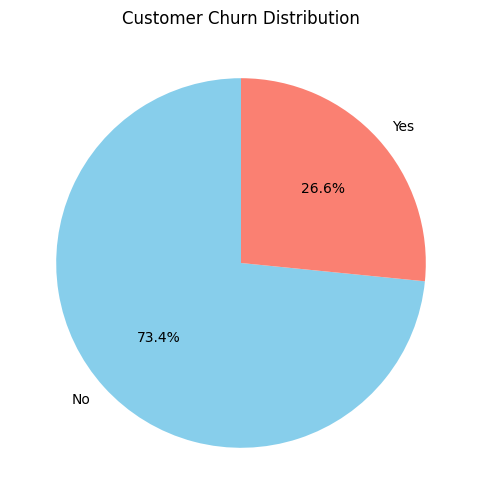

<ipython-input-5-3254f23af0d3>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y='Monthly Charges', palette='coolwarm')


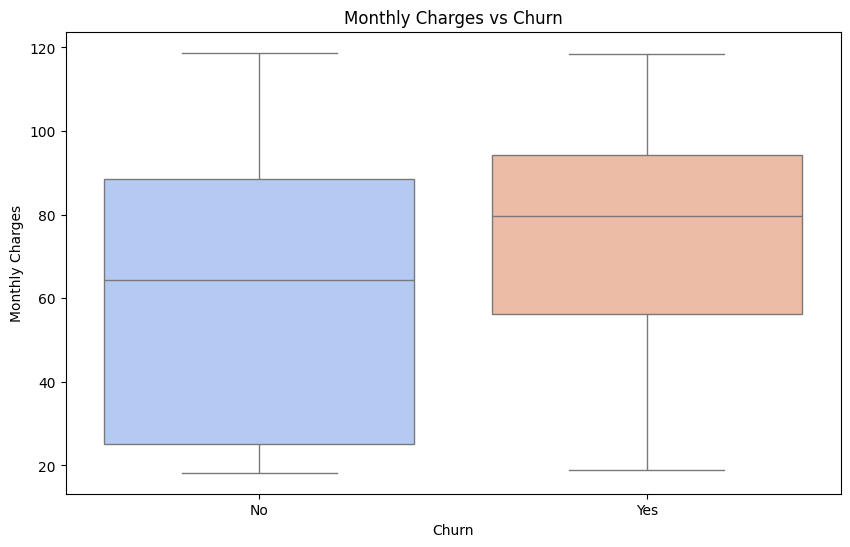

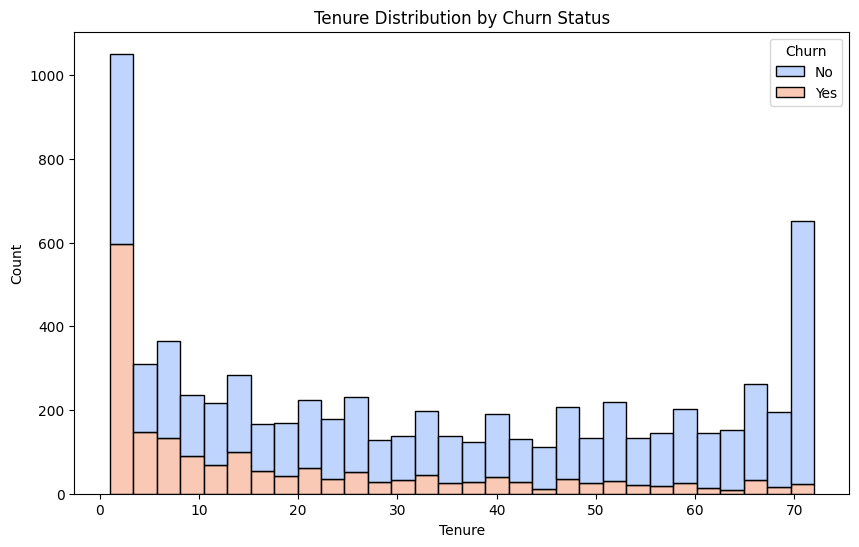

Confusion Matrix:
[[943  90]
 [211 163]]

Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.91      0.86      1033
        True       0.64      0.44      0.52       374

    accuracy                           0.79      1407
   macro avg       0.73      0.67      0.69      1407
weighted avg       0.77      0.79      0.77      1407



In [ ]:
# Capstone Project: Predicting Customer Churn in Telecom Industry

# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load Dataset
data = pd.read_csv("sample_data/CustomerChurn.csv")

# Data Overview
print(data.head())
print(data.info())

# Data Cleaning: Convert Total Charges to numeric and handle missing values
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')
data.dropna(inplace=True)

# Exploratory Data Analysis (EDA)
# Distribution of Churned vs Non-Churned Customers (Pie Chart)
plt.figure(figsize=(8, 6))
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Customer Churn Distribution')
plt.ylabel('')
plt.show()

# Monthly Charges vs Churn (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Churn', y='Monthly Charges', palette='coolwarm')
plt.title('Monthly Charges vs Churn')
plt.show()

# Tenure Distribution by Churn Status (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Tenure', hue='Churn', multiple='stack', palette='coolwarm', bins=30)
plt.title('Tenure Distribution by Churn Status')
plt.show()

# Feature Engineering (Encoding Categorical Variables)
data_encoded = pd.get_dummies(data, drop_first=True)

# Splitting Data into Train and Test Sets
X = data_encoded.drop('Churn_Yes', axis=1)
y = data_encoded['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training: Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation: Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance Visualization
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns,
                                    columns=['Importance']).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index)
plt.title('Feature Importance')
plt.show()


# New Section